## **Project Name**    -   Video Games Sales & Engagement Analysis

#### **Project type** - Exploratory data analysis and Business intelligence dashboard
##### **Contribution**    - Individual
##### **Author**          - Bhavesh Kumar

## **Project Summary**

The goal of this project is to perform exploratory data analysis (EDA) on video game engagement and sales datasets to understand industry trends, user behavior patterns, genre dynamics, and regional sales performance. The analysis focuses on identifying the key factors that influence commercial success by integrating user engagement metrics (ratings, wishlist, plays) with global and regional sales data.

### **Data Collection and Cleaning:**

- Game Engagement Dataset (ratings, wishlist, plays, reviews, genres, release details)
- Video Game Sales Dataset (platform, publisher, regional sales, global sales)

##### *Data cleaning steps included:*
- Handling missing values in release dates, ratings, and team fields
- Removing duplicate records
- Exploding multi-genre entries for detailed genre-level analysis
- Exploding multi-genre entries for detailed genre-level analysis
- Ensuring proper data types for year and numerical columns

### **Exploratory Data Analysis and Visualization:**
 
Univariate, bivariate, and multivariate analysis was conducted using Python libraries (matplotlib and seaborn) and SQL queries.

### **Problem Statement**

##### The goal of this project is to identify the key factors that influence video game sales by analyzing production volume, genre trends, user engagement behavior, and regional market performance. The findings aim to provide insights into which types of games and markets generate the highest commercial returns.

### **Insights:**

- North America is the dominant revenue driver, followed by Europe, with Japan showing strong specialization in Role-Playing games.
- The industry peaked around 2008–2009, reflecting major console generation cycles.
- Wishlist count shows a moderate positive relationship with global sales, suggesting pre-release demand can indicate commercial success.
- Action and RPG genres dominate both production and revenue, while MOBA and Shooter genres exhibit the highest engagement intensity.
- Regional preferences differ significantly, with Western markets favoring Shooter and Sports genres, while Japan prefers RPG titles.
- High production volume does not necessarily translate to high engagement or sales, highlighting differences between supply concentration and market performance.
- The gaming industry follows a blockbuster-driven model, where a small number of titles generate disproportionately high revenue.
- Engagement and quality (ratings) do not always directly correlate with total sales, indicating the impact of brand equity and marketing.

### **Business Impact**

This analysis provides actionable insights for game developers, publishers, and investors by identifying the key drivers of commercial success in the video game industry. By linking user engagement metrics such as ratings, wishlist counts, and play frequency with regional and global sales performance, the project highlights which genres, platforms, and markets generate the highest returns. The findings support data-driven decision-making in areas such as genre investment strategy, regional market targeting, platform prioritization, and pre-release demand forecasting. Overall, the integrated engagement and sales analysis enables stakeholders to better align production, marketing, and distribution strategies to maximize revenue and long-term player engagement.

### **Starting with the EDA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the datasets
games_df = pd.read_csv('Datasets/games.csv')
vgsales_df = pd.read_csv('Datasets/vgsales.csv')

### *Preprocessing games dataset*

In [4]:
# Structure of the games dataset
games_df.shape

(1512, 14)

In [9]:
games_df.head(3)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K


In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [10]:
# Removing columns that are not needed for analysis
games_df.drop(columns=['Unnamed: 0','Summary','Reviews'], inplace=True)

In [ ]:
# All column names
games_df.columns

Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Plays', 'Playing', 'Backlogs',
       'Wishlist'],
      dtype='object')

In [12]:
# renaming the column names
games_df.columns = games_df.columns.str.lower().str.replace(' ', '_')

In [14]:
games_df = games_df.rename(columns={'genres': 'genre'})

In [15]:
# Keep the original column as-is
games_df['release_date_raw'] = games_df['release_date']  

# Create a new column with converted datetime values
games_df['release_date'] = pd.to_datetime(games_df['release_date'], errors='coerce')

# New 'year' column
games_df['year'] = games_df['release_date'].dt.year

In [16]:
# Show all rows where release_date is null (NaT)
missing_dates = games_df['release_date'].isna()
games_df.loc[missing_dates]

,title,release_date,team,rating,times_listed,number_of_reviews,genre,plays,playing,backlogs,wishlist,release_date_raw,year
644,Deltarune,NaT,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",1.3K,83,468,617,releases on TBD,NaN
649,Death Stranding 2,NaT,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",3,0,209,644,releases on TBD,NaN
1252,Elden Ring: Shadow of the Erdtree,NaT,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",1,0,39,146,releases on TBD,NaN


In [17]:
games_df.drop(columns=['release_date_raw'], inplace=True)

In [18]:
games_df['team'] = games_df['team'].astype(str).str.strip("[]").str.replace("'", "").str.replace('"', '')

In [19]:
cols = ['times_listed', 'number_of_reviews', 'plays', 'playing', 'backlogs', 'wishlist']

for col in cols:
    games_df[col] = games_df[col].str.replace(',', '').apply(
        lambda x: float(x.replace('K', '')) * 1000 if 'K' in str(x) else float(x))

In [123]:
games_df.head(3)

,title,release_date,team,rating,times_listed,number_of_reviews,genre,plays,playing,backlogs,wishlist,year
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900.0,3900.0,"['Adventure', 'RPG']",17000.0,3800.0,4600.0,4800.0,2022.0
1,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000.0,3200.0,6300.0,3600.0,2019.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300.0,4300.0,"['Adventure', 'RPG']",30000.0,2500.0,5000.0,2600.0,2017.0


In [21]:
games_df['genre'] = games_df['genre'].str.split(',')
games_df = games_df.explode('genre').reset_index(drop=True)
games_df['genre'] = games_df['genre'].str.strip('[]').str.strip("'").str.strip().str.title()
games_df['genre'] = games_df['genre'].replace('', np.nan)

In [23]:
games_df.head()

,title,release_date,team,rating,times_listed,number_of_reviews,genre,plays,playing,backlogs,wishlist,year
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900.0,3900.0,Adventure,17000.0,3800.0,4600.0,4800.0,2022.0
1,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900.0,3900.0,Rpg,17000.0,3800.0,4600.0,4800.0,2022.0
2,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,Adventure,21000.0,3200.0,6300.0,3600.0,2019.0
3,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,Brawler,21000.0,3200.0,6300.0,3600.0,2019.0
4,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,Indie,21000.0,3200.0,6300.0,3600.0,2019.0


In [15]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3645 non-null   object        
 1   release_date       3636 non-null   datetime64[ns]
 2   team               3645 non-null   object        
 3   rating             3623 non-null   float64       
 4   times_listed       3645 non-null   float64       
 5   number_of_reviews  3645 non-null   float64       
 6   genre              3642 non-null   object        
 7   plays              3645 non-null   float64       
 8   playing            3645 non-null   float64       
 9   backlogs           3645 non-null   float64       
 10  wishlist           3645 non-null   float64       
 11  year               3636 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 341.8+ KB


In [24]:
games_df.isnull().sum()

title                 0
release_date          9
team                  0
rating               22
times_listed          0
number_of_reviews     0
genre                 3
plays                 0
playing               0
backlogs              0
wishlist              0
year                  9
dtype: int64

In [26]:
games_df['rating'] = games_df['rating'].fillna(games_df['rating'].median())

In [18]:
games_df.isnull().sum()

title                0
release_date         9
team                 0
rating               0
times_listed         0
number_of_reviews    0
genre                3
plays                0
playing              0
backlogs             0
wishlist             0
year                 9
dtype: int64

In [19]:
games_df.head(3)

,title,release_date,team,rating,times_listed,number_of_reviews,genre,plays,playing,backlogs,wishlist,year
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900.0,3900.0,Adventure,17000.0,3800.0,4600.0,4800.0,2022.0
1,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900.0,3900.0,'Rpg,17000.0,3800.0,4600.0,4800.0,2022.0
2,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,Adventure,21000.0,3200.0,6300.0,3600.0,2019.0


In [27]:
float_cols = ['times_listed', 'number_of_reviews', 'plays', 'playing','backlogs', 'wishlist','year']
for col in float_cols:
    games_df[col] = pd.to_numeric(games_df[col], errors='coerce').astype('Int64')

In [29]:
# Define the desired order of columns
new_order = [
    'title', 'genre', 'release_date', 'year', 'team', 'rating',
    'times_listed', 'number_of_reviews', 'plays', 'playing',
    'backlogs', 'wishlist'
]
# Reorder DataFrame
games_df = games_df[new_order]

In [30]:
games_df.head()

,title,genre,release_date,year,team,rating,times_listed,number_of_reviews,plays,playing,backlogs,wishlist
0,Elden Ring,Adventure,2022-02-25,2022,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,17000,3800,4600,4800
1,Elden Ring,Rpg,2022-02-25,2022,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,17000,3800,4600,4800
2,Hades,Adventure,2019-12-10,2019,Supergiant Games,4.3,2900,2900,21000,3200,6300,3600
3,Hades,Brawler,2019-12-10,2019,Supergiant Games,4.3,2900,2900,21000,3200,6300,3600
4,Hades,Indie,2019-12-10,2019,Supergiant Games,4.3,2900,2900,21000,3200,6300,3600


In [31]:
print(games_df.duplicated().sum())
games_df.drop_duplicates(inplace=True)

955


In [142]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2690 entries, 0 to 3644
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2690 non-null   object        
 1   genre              2687 non-null   object        
 2   release_date       2681 non-null   datetime64[ns]
 3   year               2681 non-null   Int64         
 4   team               2690 non-null   object        
 5   rating             2690 non-null   float64       
 6   times_listed       2690 non-null   Int64         
 7   number_of_reviews  2690 non-null   Int64         
 8   plays              2690 non-null   Int64         
 9   playing            2690 non-null   Int64         
 10  backlogs           2690 non-null   Int64         
 11  wishlist           2690 non-null   Int64         
dtypes: Int64(7), datetime64[ns](1), float64(1), object(3)
memory usage: 291.6+ KB


In [24]:
games_df.describe()

,release_date,year,rating,times_listed,number_of_reviews,plays,playing,backlogs,wishlist
count,2681,2681.0,2690.000000,2690.0,2690.0,2690.0,2690.0,2690.0,2690.0
mean,2013-02-13 20:27:18.194703616,2012.565461,3.677138,607.028996,607.028996,4915.910409,198.956134,1212.17881,634.692193
min,1980-05-22 00:00:00,1980.0,0.700000,0.0,0.0,0.0,0.0,1.0,2.0
25%,2008-06-12 00:00:00,2008.0,3.400000,233.0,233.0,1400.0,38.0,407.0,188.0
50%,2014-11-11 00:00:00,2014.0,3.700000,445.0,445.0,3200.0,89.0,801.0,445.0
75%,2019-09-20 00:00:00,2019.0,4.100000,777.0,777.0,6700.0,206.0,1700.0,803.25
max,2025-03-31 00:00:00,2025.0,4.800000,4300.0,4300.0,33000.0,3800.0,8300.0,5400.0
std,NaN,8.215901,0.531137,563.394177,563.394177,4968.571965,336.020582,1156.08096,665.357325


In [163]:
games_df.to_csv('Datasets/games_cleaned.csv', index=False)

### ________________________________________________________________________________________________________________________________________________________________________ ###

### *Preprocessing sales dataset*

In [32]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [33]:
vgsales_df.shape

(16598, 11)

In [34]:
vgsales_df = vgsales_df.drop(columns=['Rank'])
vgsales_df.columns = vgsales_df.columns.str.lower().str.replace(' ', '_').str.strip()

In [35]:
vgsales_df.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [85]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16598 non-null  object 
 1   platform      16598 non-null  object 
 2   year          16327 non-null  float64
 3   genre         16598 non-null  object 
 4   publisher     16540 non-null  object 
 5   na_sales      16598 non-null  float64
 6   eu_sales      16598 non-null  float64
 7   jp_sales      16598 non-null  float64
 8   other_sales   16598 non-null  float64
 9   global_sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [37]:
vgsales_df['year'] = pd.to_numeric(vgsales_df['year'], errors='coerce').astype('Int64')

In [38]:
text_cols = ['name', 'platform', 'genre', 'publisher']
for col in text_cols:
    vgsales_df[col] = vgsales_df[col].str.strip().str.replace('.', '').str.replace("'", '')

In [32]:
vgsales_df.head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [80]:
vgsales_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [40]:
# Mapping dictionary: platform → brand
platform_category = {
    # Play_Station
    "PS": "Play_Station", "PS2": "Play_Station", "PS3": "Play_Station", "PS4": "Play_Station",
    "PSP": "Play_Station", "PSV": "Play_Station",
    # Xbox
    "XB": "Xbox", "X360": "Xbox", "XOne": "Xbox",
    # Nintendo
    "NES": "Nintendo", "SNES": "Nintendo", "N64": "Nintendo", "GC": "Nintendo",
    "Wii": "Nintendo", "WiiU": "Nintendo", "GB": "Nintendo", "GBA": "Nintendo",
    "DS": "Nintendo", "3DS": "Nintendo",
    # Sega
    "GEN": "Sega", "SAT": "Sega", "DC": "Sega", "SCD": "Sega", "GG": "Sega",
    # NEC
    "PCFX": "NEC", "TG16": "NEC",
    # Bandai 
    "WS": "Bandai",
    # Panasonic
    "3DO": "Panasonic",
    # SNK
    "NG" : "SNK",
    # Atari
    "2600": "Atari",
    # PC
    "PC": "PC"
}

# Add new column with brand flag
vgsales_df["platform_category"] = vgsales_df["platform"].map(platform_category)
vgsales_df.head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,platform_category
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo
6,New Super Mario Bros,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo
8,New Super Mario Bros Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo


In [42]:
vgsales_df.isna().sum()

name                   0
platform               0
year                 271
genre                  0
publisher             58
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
global_sales           0
platform_category      0
dtype: int64

In [43]:
vgsales_df = vgsales_df.drop_duplicates()

In [44]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16597 non-null  object 
 1   platform           16597 non-null  object 
 2   year               16327 non-null  Int64  
 3   genre              16597 non-null  object 
 4   publisher          16539 non-null  object 
 5   na_sales           16597 non-null  float64
 6   eu_sales           16597 non-null  float64
 7   jp_sales           16597 non-null  float64
 8   other_sales        16597 non-null  float64
 9   global_sales       16597 non-null  float64
 10  platform_category  16597 non-null  object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [194]:
vgsales_df.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.0,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,2006.406443,0.264683,0.146661,0.077785,0.048066,0.537472
std,5.828981,0.816705,0.505365,0.309300,0.188594,1.555070
min,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.0,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.0,41.490000,29.020000,10.220000,10.570000,82.740000


In [195]:
vgsales_df.to_csv('Datasets/vgsales_cleaned.csv', index=False)

### _________________________________________________________________________________________________________________________________________________________________________ ###

In [45]:
merged_data = pd.merge(games_df, vgsales_df, left_on = 'title', right_on = 'name', how='inner')

In [47]:
merged_data.shape

(1844, 23)

In [48]:
merged_data['platform'].unique()

array(['X360', 'PS3', 'PS4', 'XOne', 'PSV', 'WiiU', 'PS2', 'PC', 'N64',
       'DS', 'PS', 'Wii', 'GC', 'GBA', '3DS', 'SNES', 'XB', 'PSP', 'GEN',
       'GB', 'NES', 'SAT', '2600', 'DC', 'SCD'], dtype=object)

### _________________________________________________________________________________________________________________________________________________________________________ ###

**1.What are the top-rated games by user reviews?**

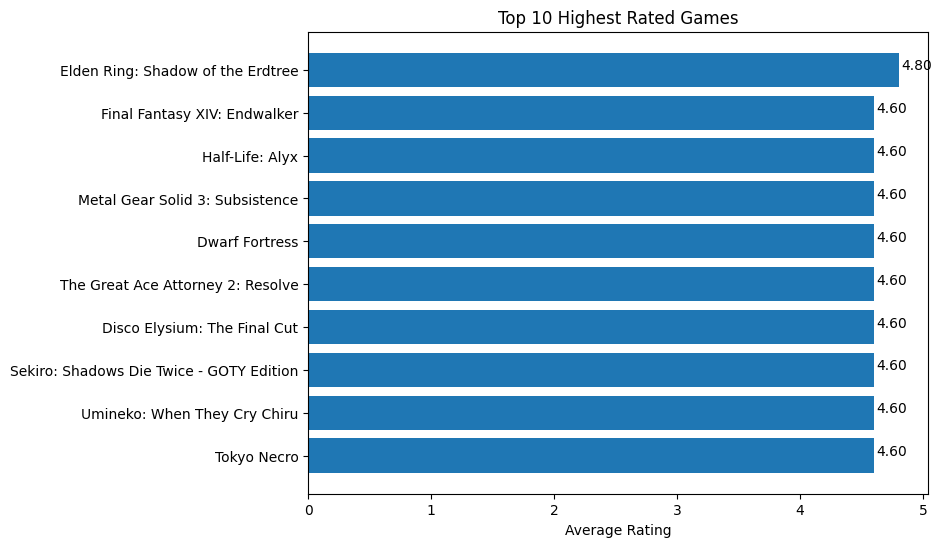

In [79]:
top_rated = (games_df.groupby('title').agg(avg_rating=('rating', 'mean'),
         total_reviews=('number_of_reviews', 'sum'))
    .sort_values('avg_rating', ascending=False)
    .head(10)
)
top_rated_sorted = top_rated.sort_values('avg_rating')

plt.figure(figsize=(8,6))
bars = plt.barh(
    top_rated_sorted.index,
    top_rated_sorted['avg_rating']
)
plt.xlabel("Average Rating")
plt.title("Top 10 Highest Rated Games")
for i, v in enumerate(top_rated_sorted['avg_rating']):
    plt.text(v + 0.02, i, f"{v:.2f}")

plt.show()

#### 📝 Insights:

- #### The top-rated games are tightly clustered within a narrow rating band (4.6–4.8), suggesting that once games reach an elite quality threshold, differences in perceived quality become marginal.
- #### Elden Ring’s expansion leads the ranking, indicating strong sustained franchise quality and successful post-launch content strategy.

**2.What are the most common genres?**

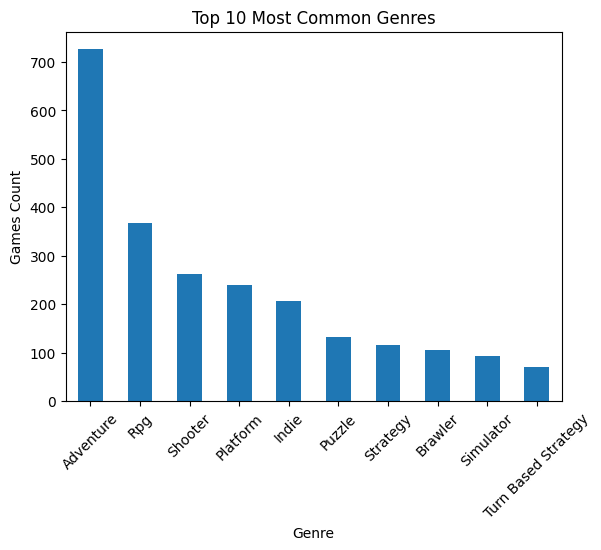

In [106]:
genre_counts = games_df['genre'].value_counts().head(10)

plt.figure()
genre_counts.plot(kind='bar')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Games Count")
plt.xticks(rotation=45)
plt.show()

#### 📝 Insights:
- ##### Adventure is the most produced genre in the dataset, suggesting that developers favor narrative-driven and exploration-based game design.
- ##### Although Adventure dominates production volume, it does not necessarily lead in engagement intensity or revenue, highlighting the difference between supply concentration and market performance.

**3.What is the game release trend over years?**

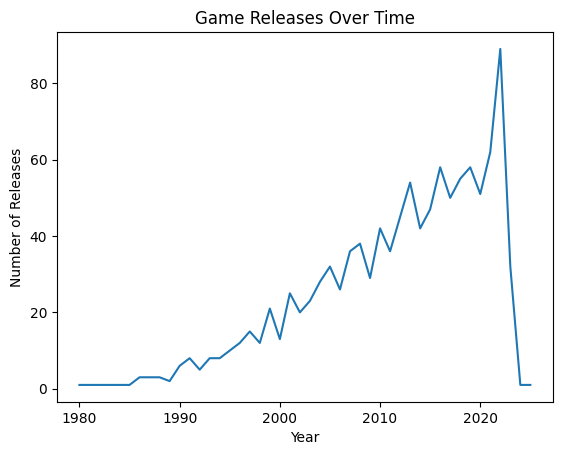

In [90]:
release_trend = (
    games_df
    .groupby('year')['title']
    .nunique()
    .sort_index()
)

plt.figure()
release_trend.plot(kind='line')
plt.title("Game Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

#### 📝 Insights:
- ##### The gaming industry has experienced consistent long-term expansion, with production accelerating significantly after the early 2000s.
- ##### The sharp decline in the final year likely reflects incomplete dataset coverage rather than a true market contraction.

**4.What are the top 10 most wishlisted games?**

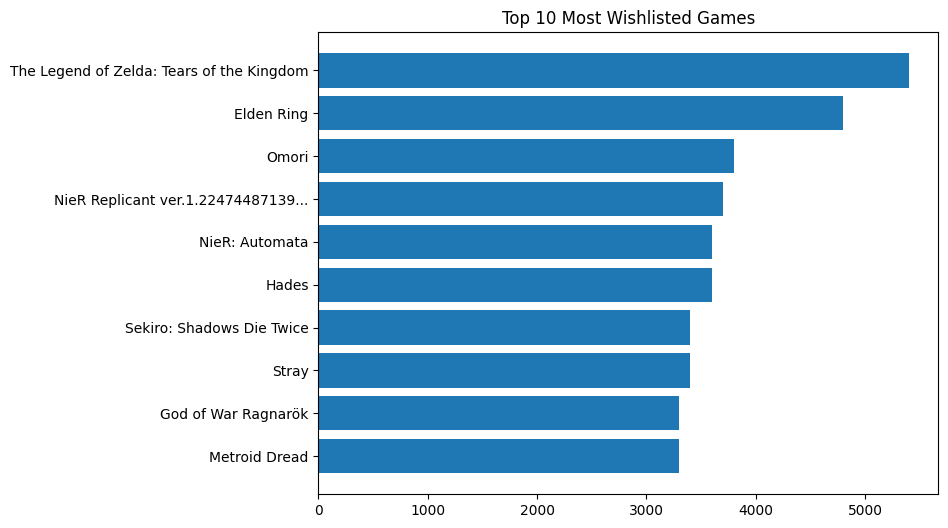

In [89]:
top_wishlist = (
    games_df
    .groupby('title', as_index=False)
    .agg(total_wishlist=('wishlist', 'mean'))
    .sort_values('total_wishlist', ascending=False)
    .head(10)
)
plt.figure(figsize=(8,6))
plt.barh(top_wishlist['title'], top_wishlist['total_wishlist'])
plt.title("Top 10 Most Wishlisted Games")
plt.gca().invert_yaxis()
plt.show()

#### 📝 Insights:
- ##### Wishlist rankings suggest strong predictive potential for commercial performance, as high pre-release interest often translates into higher launch sales.

**5.What’s the average plays per genre?**

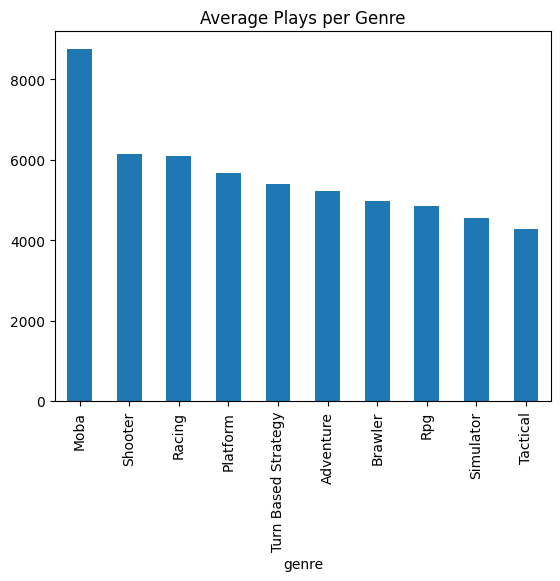

In [76]:
plays_by_genre = (
    games_df.groupby('genre')['plays']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
plays_by_genre.plot(kind='bar')
plt.title("Average Plays per Genre")
plt.show()


#### 📝 Insights:
- ##### MOBA games exhibit the highest average play counts, indicating extremely high engagement intensity and long-term player retention.
- ##### Shooter and Racing genres also demonstrate strong engagement levels, likely due to competitive gameplay mechanics and multiplayer ecosystems.
- ##### Tactical and Simulator genres show relatively lower average play counts, indicating niche audiences or more specialized gameplay experiences.

**6.Which region generates the most sales?**

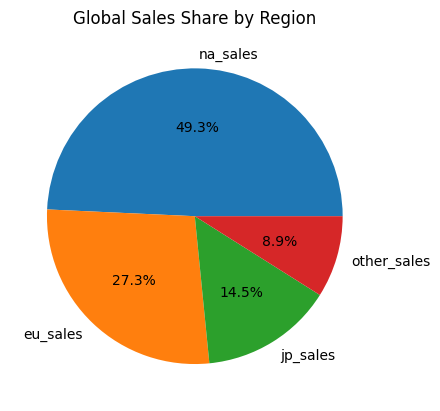

In [63]:
regional_sales = vgsales_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
regional_percent = regional_sales / regional_sales.sum() * 100

plt.figure()
plt.pie(
    regional_percent,
    labels=regional_percent.index,
    autopct='%1.1f%%'
)
plt.title("Global Sales Share by Region")
plt.show()

#### 📝 Insights:
- ##### North America is the largest contributor to global video game sales, indicating the region’s strong consumer purchasing power and dominant gaming culture.
- ##### Europe represents a strong secondary market, contributing substantially to global revenue, though still trailing behind North America.
- ##### Japan contributes meaningfully to global sales but at a smaller scale compared to Western markets, suggesting regional genre and platform specialization.

**7.What are the top-performing Genre + Region combinations?**

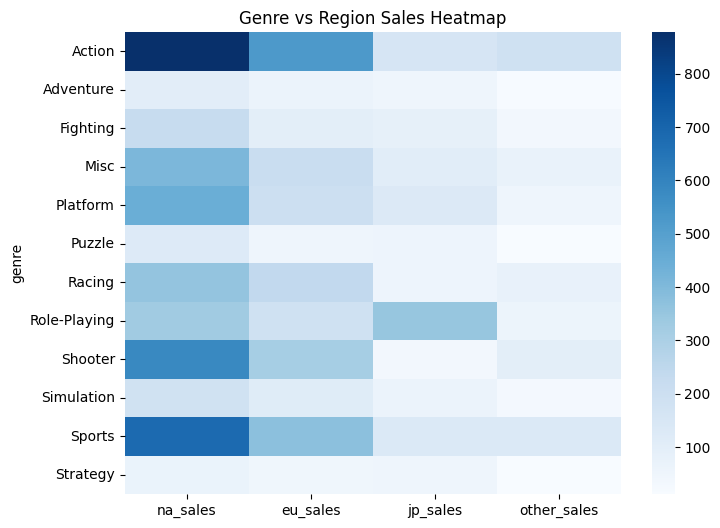

In [70]:
genre_region = vgsales_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure(figsize=(8,6))
sns.heatmap(genre_region, cmap="Blues")
plt.title("Genre vs Region Sales Heatmap")
plt.show()

#### 📝 Insights:
- ##### North America leads sales across nearly all major genres, particularly Action, Sports, and Shooter, reinforcing its position as the dominant revenue-driving region in the gaming industry.
- ##### Japan demonstrates a strong preference for Role-Playing games, indicating genre specialization and culturally driven gaming preferences.
- ##### Sports and Shooter genres generate significantly higher sales in Western markets compared to Japan, suggesting regional demand differences tied to cultural and entertainment preferences.
- ##### Action games exhibit broad international appeal, making them one of the most commercially viable and globally scalable genres.

**8.What are the best-selling platforms?**

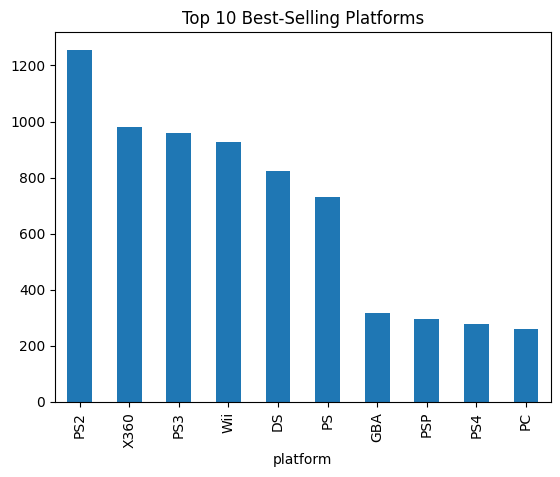

In [54]:
platform_sales = (
    vgsales_df.groupby('platform')['global_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
platform_sales.plot(kind='bar')
plt.title("Top 10 Best-Selling Platforms")
plt.show()


#### 📝 Insight:
##### PS2, X360 & PS3 significantly outperform others in global sales, reflecting strong hardware adoption cycles and exclusive title ecosystems.

**9.What’s the trend of releases and sales over time?**

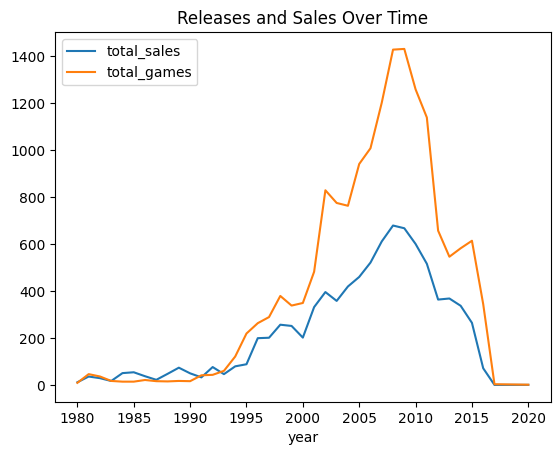

In [55]:
trend = (
    vgsales_df.groupby('year')
    .agg(total_sales=('global_sales','sum'),
         total_games=('name','count'))
)

trend[['total_sales','total_games']].plot()
plt.title("Releases and Sales Over Time")
plt.show()

#### 📝 Insights:
- ##### The gaming industry experienced rapid expansion between the mid-1990s and late-2000s, with both game production and total sales rising significantly. This period likely reflects the rise of major console generations and growing global adoption.
- ##### The industry reached its peak around 2008–2009 in both output and commercial performance, indicating a mature console market cycle and strong consumer demand.
- ##### Sales and number of games are strongly correlated. When releases increase → sales increase
- ##### The post-2010 decline may partially reflect limitations of the dataset, as it does not fully capture digital distribution, mobile gaming, and subscription-based revenue models.

**10.Top 10 best-selling games globally**

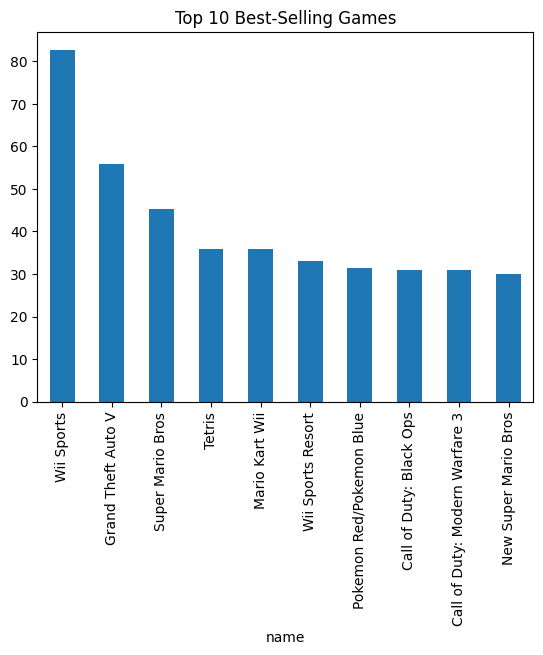

In [57]:
top_games = (
    vgsales_df.groupby('name')['global_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_games.plot(kind='bar')
plt.title("Top 10 Best-Selling Games")
plt.show()


#### 📝 Insight:

##### Top 10 games contribute disproportionately to total industry sales, highlighting the blockbuster-driven nature of the gaming industry.

**11.Does rating affect global sales?**

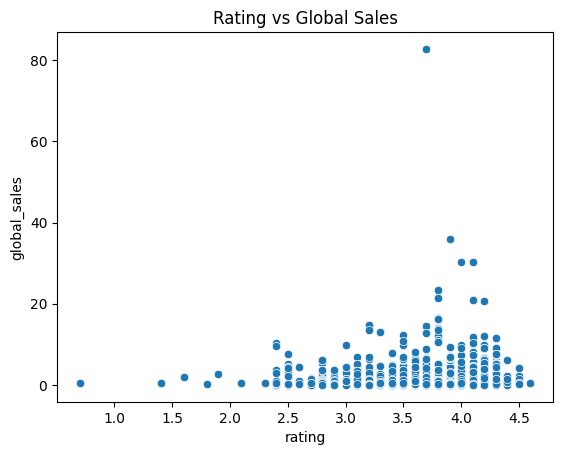

In [61]:
sns.scatterplot(
    x='rating',
    y='global_sales',
    data=merged_data
)
plt.title("Rating vs Global Sales")
plt.show()

#### 📝 Insights:

- ##### Most games cluster around mid-to-high rating ranges (3.5–4.5), indicating generally positive user reception. Extremely low-rated games are rare, suggesting quality filtering in the market.
- ##### While higher-rated games generally show better sales performance, the relationship is moderate rather than absolute. Marketing strength and franchise reputation also influence sales beyond ratings.

**12.Do highly wishlisted games lead to more sales?**

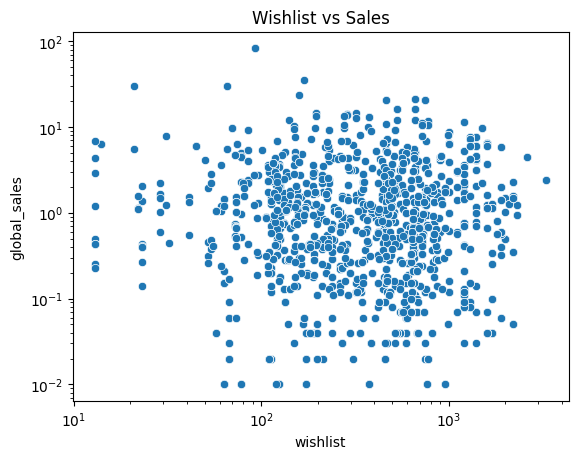

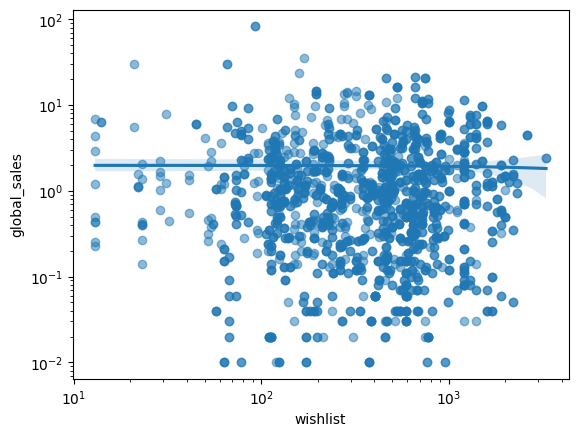

In [61]:
sns.scatterplot(
    x='wishlist',
    y='global_sales',
    data=merged_data
)
plt.xscale('log')
plt.yscale('log')
plt.title("Wishlist vs Sales")
plt.show()

sns.regplot(
    x='wishlist',
    y='global_sales',
    data=merged_data,
    scatter_kws={'alpha':0.5}
)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 📝 Insights:

- ##### Wishlist count appears to have a positive association with global sales, but the relationship is not strongly linear. High wishlist does not always guarantee high sales.
- ##### Most games are clustered below 10 million sales. Only a few extreme outliers reach 30+ or 80+ million.
- ##### The log-scaled scatter plot reveals a moderate positive association between wishlist counts and global sales. While higher wishlist values generally correspond to higher sales, significant dispersion indicates that wishlist alone is insufficient to predict commercial success. The distribution also reflects the blockbuster-driven nature of the gaming industry, where a small subset of titles dominate total revenue.

**13.What are the top-performing Genre + Platform combinations?**

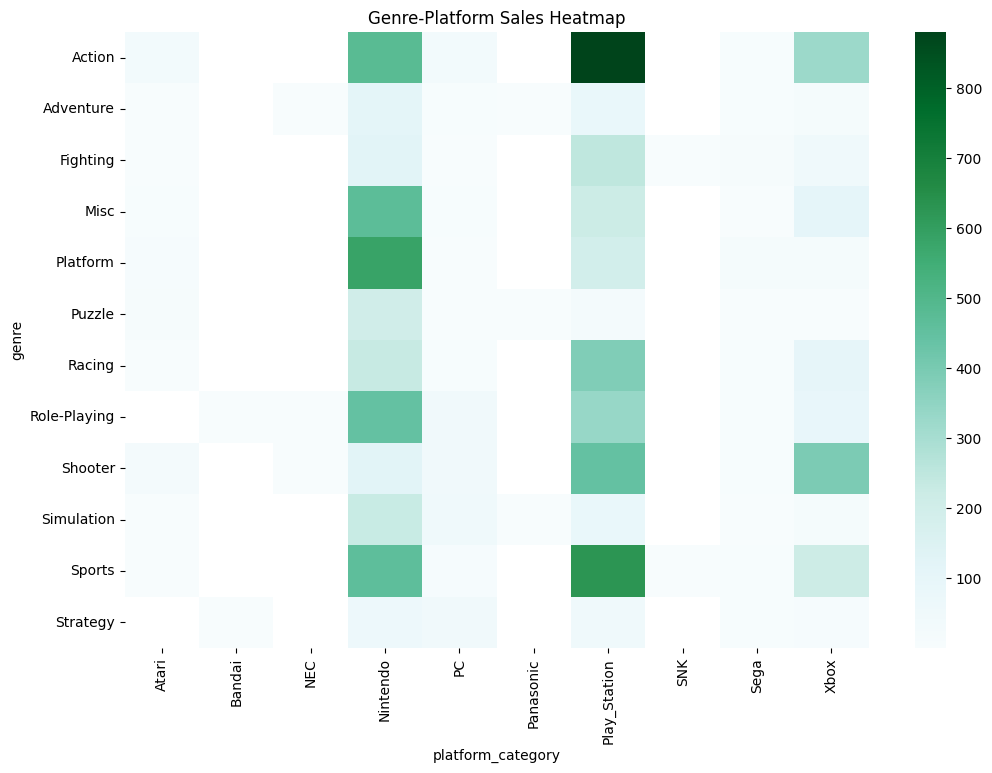

In [86]:
pivot = vgsales_df.pivot_table(
    values='global_sales',
    index='genre',
    columns='platform_category',
    aggfunc='sum'
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="BuGn")
plt.title("Genre-Platform Sales Heatmap")
plt.show()

#### 📝 Insights:

- ##### Maximum games are played on Play Station and Nintendo, followed by Xbox.
- ##### PlayStation Dominates Across Multiple Genres. It consistently shows the highest sales intensity across major genres such as Action, Sports, Shooter, and Racing. This indicates strong market penetration and broad genre appeal on Sony’s platform ecosystem.
- ##### Nintendo show particularly strong performance in Platform, Misc and Action genres, reinforcing Nintendo’s reputation for character-driven and franchise-based games.
- ##### Action & Sports games show peak performance on PlayStation, indicating a strong alignment between sports gaming audiences and Sony’s user base.
- ##### The Action genre demonstrates high sales across nearly all major platforms, reinforcing its position as the most commercially viable genre category.
- ##### Puzzle, Strategy & Simulation genres exhibit moderate but consistent sales across platforms, indicating steady but non-blockbuster demand.
- ##### Role-Playing games perform well across both Nintendo and PlayStation, suggesting broader demographic appeal compared to niche genres like Strategy or Puzzle.
- ##### Platforms such as Atari, NEC, Bandai, SNK and Panasonic display significantly lower genre-wise sales intensity, reflecting earlier console generations with smaller market scale.

**14.Which region generates more revenue?**

<Figure size 640x480 with 0 Axes>

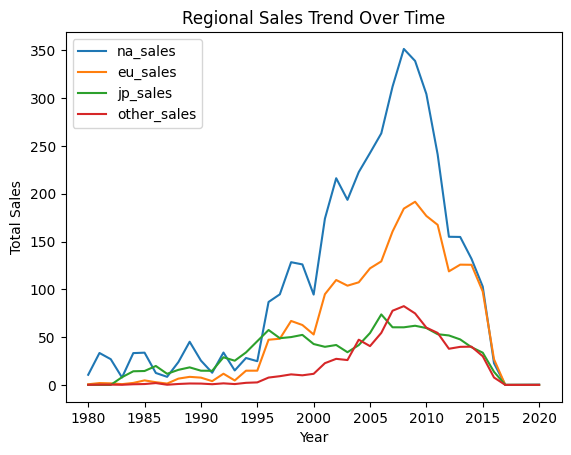

In [71]:
region_trend = vgsales_df.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

plt.figure()
region_trend.plot()
plt.title("Regional Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

#### 📝 Insights:
- ##### North America consistently leads global sales and drives overall industry peaks, particularly during the 2007–2009 console generation boom. Market fluctuations in NA strongly influence global performance trends.
- ##### Europe exhibits a similar growth trajectory to North America but at a smaller scale, suggesting aligned market behavior across Western regions with slightly delayed peak intensity.
- ##### Japan’s sales peak earlier and at a lower magnitude compared to Western markets, reflecting different console preferences and potentially earlier market saturation.
- ##### Emerging markets demonstrate steady growth leading up to the late-2000s peak, indicating gradual global expansion beyond traditional gaming regions.
- ##### The synchronized peak across regions suggests a strong global console generation effect, likely driven by the PS3, Xbox 360, and Wii era.
- ##### The post-2010 decline across all regions likely reflects console transition periods and the growing shift toward digital, mobile, and subscription-based gaming not fully captured in the dataset.

## **Solutions to the Business Objective**

- **Prioritize High-Performing Genres:**
Invest more resources in genres such as Action, RPG, and Shooter, which consistently demonstrate strong sales and engagement. These genres offer higher commercial scalability across multiple regions.
- **Leverage Wishlist as a Demand Forecasting Tool:**
Use wishlist counts as an early indicator of market demand to guide production scaling, marketing intensity, and launch strategy. Games with high pre-release interest should receive stronger promotional support and optimized launch timing.
- **Adopt Region-Specific Marketing Strategies:**
Tailor marketing and distribution strategies according to regional preferences—e.g., emphasize RPG titles in Japan and Shooter/Sports titles in North America and Europe.
- **Optimize Platform Targeting:**
Focus on platforms that historically generate higher sales within specific genres. Align genre development with platform strengths to maximize return on investment.
- **Balance Blockbuster and Niche Portfolio:**
While blockbuster franchises drive significant revenue, maintaining a diversified portfolio—including indie and niche titles—reduces risk and captures varied audience segments.
- **Enhance Engagement-Driven Monetization Models:**
For high-engagement genres (e.g., MOBA and Shooter), consider live-service models, expansions, and in-game monetization strategies to sustain long-term revenue.
- **Monitor Console Lifecycle Trends:**
Align major releases with peak console adoption cycles and prepare adaptive strategies during transitional periods between hardware generations.

## **Conclusion**

##### This project provides a comprehensive analysis of the video game industry by integrating user engagement data with global and regional sales performance. The findings reveal that commercial success is influenced by a combination of genre popularity, regional market dynamics, platform strength, and pre-release engagement indicators such as wishlist counts. While blockbuster titles and established franchises dominate revenue generation, engagement intensity varies significantly across genres, highlighting differences between replay-driven and narrative-driven game models. The industry exhibits clear lifecycle patterns, with peak performance aligning with major console generations and subsequent shifts reflecting structural changes in distribution and consumption models. Overall, the analysis demonstrates that combining behavioral engagement metrics with sales data offers a deeper, data-driven understanding of what drives success in the gaming market, enabling more informed strategic decisions for developers and publishers.